<a href="https://colab.research.google.com/github/rifyalt/vial/blob/master/Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analsis ini dibuat hanya semata untuk menjadi bahan analisa untuk mendapatkan insight baik untuk kemajuan bersama tanpa ada maksud lain menyudutkan atau hal lainnya.

Untuk analisis saat ini saya akan bahas tentang salah satu aplikasi Teknologi Finansial buatan PT.Bank MNC International, Tbk. (**MOTION**)

https://id.linkedin.com/in/rifyaltumber

---

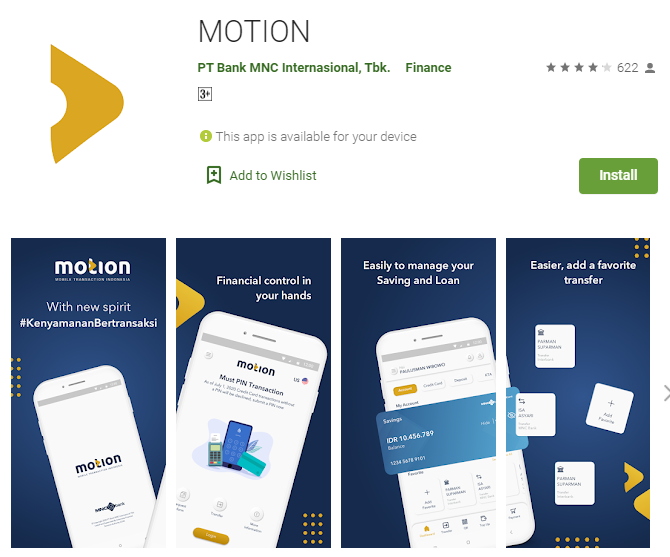

In [ ]:
#Langkah 1 - install google play scrapper

!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 4.3MB/s 


In [ ]:
#Langkah 2

#import library
import json
import pandas as pd
from tqdm import tqdm
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, reviews_all, app

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# sns.set(style='whitegrid', palette='muted', font_scale=1.2)

pd.options.mode.chained_assignment = None 
pd.options.display.max_colwidth=200


Bisa mendapatkan 2 dataset dari Google Play Scrapper Library yaitu:
- **App Information** 
- **App Review**


---

In [ ]:
# Langkah - 3

# id aplikasi didapat dari halaman google play store page 
# https://play.google.com/store/apps/details?id=com.mnc.mbanking

ap = 'com.mnc.mbanking'

In [ ]:
# Langkah - 4

# Untuk mencari insight berdasarkan info dari aplikasi Motion

app_infos = []

info = app(ap, lang='in', country='id')
del info['comments']
app_infos.append(info)

In [ ]:
# Langkah - 5
# membuat data frame
app_info_df = pd.DataFrame([app_infos[0]])
app_info_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,MOTION,"Motion is a banking application from MNC Bank designed to provide various facilities and conveniences for MNC Bank customers to conduct financial & non-financial transaction, which can be accessed...","Motion is a banking application from MNC Bank designed to provide various facilities and conveniences for MNC Bank customers to conduct financial &amp; non-financial transaction, which can be acce...",Motion – Mobile Transaction by MNC Bank Internasional,Motion – Mobile Transaction by MNC Bank Internasional,10.000+,10000,3.813725,646,367,"[165, 6, 19, 50, 406]",0,True,USD,False,None,None,None,False,None,40M,5.1,5.1 dan yang lebih tinggi,"PT Bank MNC Internasional, Tbk.","PT+Bank+MNC+Internasional,+Tbk.",mncmobile@mncbank.co.id,https://mncbank.co.id/id,None,https://mncbank.co.id/assets/files/Privacy_Policy.html,9104602084387473014,Keuangan,FINANCE,https://play-lh.googleusercontent.com/9-Bn78AY1-aXDh42AZL9VvDvLo-6KnGqNTc_Hob-QC-QT8fl6NiZK6NuSlqjRlwBsA,https://play-lh.googleusercontent.com/jYiKcKxkfsLs6fbIzla61NwOD0jfgZ5Gu5AFBE_EEqdteThGdO1KBUZKhq4kwoEVxg,"[https://play-lh.googleusercontent.com/Yzerw1sZHcWee0MJImAaUGUvjUUH0StxTVhfmgYq6VRgLX6oHLh7DrXmN1tno5OsILE, https://play-lh.googleusercontent.com/zmtkJAlSjOSILxjs0QH3GZbj994IhTfbGdLH0BSsAjtJWT0nd_...",None,None,Rating 3+,None,None,False,7 Agu 2020,1612792467,1.0.9,"Terima kasih telah menggunakan Motion, pada versi terbaru ini kami menambahkan fitur :\r\n1. Pengajuan cicilan kartu kredit dalam satu kali klik\r\n2. Beberapa Perbaikan Bug","Terima kasih telah menggunakan Motion, pada versi terbaru ini kami menambahkan fitur :<br>1. Pengajuan cicilan kartu kredit dalam satu kali klik<br>2. Beberapa Perbaikan Bug",False,com.mnc.mbanking,https://play.google.com/store/apps/details?id=com.mnc.mbanking&hl=in&gl=id


In [ ]:
# Langkah - 6

# Put Histogram of Ratings in List

json_obj = json.dumps(
    app_infos[0], 
    indent=2, 
    sort_keys=True, 
    default=str
  )

a_json_object = json.loads(json_obj)
list_from_json = a_json_object["histogram"]

# Obtain based on percentage
percentage_list_histogram = []

for i in list_from_json:
  result = i/sum(list_from_json)
  result = "{:.2%}".format(result)
  percentage_list_histogram.append(result)

percentage_list_histogram

# Create a plot

import plotly.graph_objects as go # inisial

x = [1, 2, 3,4 , 5]
y = percentage_list_histogram

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto'
        )])

fig.update_layout(title_text='App Info Motion Score Histogram')

fig.show()

**Kategori Nilai :**
* 91-100 = Sangat Baik
* 81-90  = Baik
* 71-80  = Sedang
* 61-70  = Rendah
* 60-Kebawah = Sangat Rendah

### Dari histogram terlihat Aplikasi *MOTION*
---

*   Rating 5 = **71.24%**
*   Rating 4 = **6.46%**

Total **77.7%** (71.24% + 6.46%) 

Rating masuk kategori SEDANG!

In [ ]:
# Langkah - 7

app_reviews = []

result = reviews_all(
    ap,
    sleep_milliseconds=0, # defaults to 0
    lang='in', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT, can use Sort.NEWEST
    # filter_score_with=5 # defaults to None(means all score)
)

In [ ]:
app_reviews.extend(result)

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head(10) # contoh 10 hasil review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEIfQjWE00wnWtS7tSjv_9GqePMVZC3AJ9SFqYmT_5Yw7ltF1uz93GewoJM58Zr4Av9vFUBeGY8EAeCbQ,Dony Oktridia Legawa,https://play-lh.googleusercontent.com/a-/AOh14GhjnVjQliexfPOVyUKc5rDvUyrYN9mXzBODfMHc,Aplikasinya aneh. Saat daftar 6 angka pin utk loginnya. Pas selesai dan mulai login sdh di masukkan pin nya 6 angka malah keterangannya harus huruf dan angka. Gmn sih ini yg buat aplikasinya?? Lg ...,1,0,1.0.9,2021-02-25 08:39:20,"Hi, Dony Oktridia Legawa. Mohon maaf atas ketidaknyamanan yang dialami. Apakah dapat diinformasikan lebih lanjut detail kendala yang terjadi melalui layanan Call Center 24 jam MNC Bank di nomor 15...",2021-02-26 04:53:32
1,gp:AOqpTOEIeS0UZQV2DMCI3cZogCFQ5nf-10twT3dheqJ-Dxb_wyy_Lz7IJPIWyAfmrzRMn9WDxO8mKJYLRvlYcQ,Hanafi,https://play-lh.googleusercontent.com/a-/AOh14GjDnN2xdObh4eucpHXnbS3j5u3jaGRewmrplh2J0g,"Mending aplikasi yg lama punyakartu, daripada skrg, tdk bisa ubah transksi ke cicilan, selalu ada notif ""transaksi tidak memenuhi syarat cicilan"". Padahal transaksi jutaan dan tgl cetaknya masih s...",1,2,1.0.9,2021-02-09 15:10:09,"\nHi, Hanafi. Mohon maaf atas ketidaknyamanannya. Untuk kendala tersebut, silahkan lakukan kembali pengajuan perubahan transaksi kartu kredit menjadi cicilan melalui MOTION. Jika masih terdapat ke...",2021-02-16 04:53:58
2,gp:AOqpTOGbVOyb0pHVTylCHROt6Cbg_or7MHgJ7yuqzf0olIh6oKvhltHHuRzxN4nUZDMRI4SQ93DyaUoa0HHBGQ,Nur Arif,https://play-lh.googleusercontent.com/a-/AOh14Gi1bnKosBlwsYnDtAeMQdIvdLPoZN-G7h0dqfmXmA,"Masih belum ada hal yang luar biasa Aplikasinya berat, sentuh 2/3 kali baru jalan Sampai detik ini belum maksimal, Di notifikasi ada transaksi, tapi di riwayat belum muncul, sehingga mau mengajuka...",3,3,1.0.9,2021-02-18 15:08:40,"Hi Nur Arif, terima kasih untuk reviewnya. Review yang kamu berikan akan menjadi masukan untuk kami agar lebih baik untuk kedepannya. Terima kasih",2020-12-14 02:42:41
3,gp:AOqpTOEsdHxdraU1BcDhqKNU094RVml76z4TzDZMKnxFr_OVgeajxIyYskz8qy__aW0uZAf0x-XY-h3lqzhf4w,Iksan Morgan,https://play-lh.googleusercontent.com/a-/AOh14GgdhTTrstBK9aNO9XujH3v8cYJOkXZ9dIR3X9ir3Q,Otp waktu registrasi sms.nya terimanya lama banget sehingga waktu habis dan berulang ulang kali sampai saat ini blm bisa masuk. Yowes lha.,1,0,1.0.9,2021-02-19 03:46:41,"Hi, Iksan Morgan. Mohon maaf atas ketidaknyamanannya. Utk kendala Kode OTP, mohon pastikan jaringan stabil, filter SMS tidak aktif, & kapasitas penyimpanan SMS masih tersedia. Jika masih terdapat ...",2021-02-26 04:45:14
4,gp:AOqpTOH08Gj4fvuix2LgB-Ux4WATIJE8FARhY3HdGCyS6pszc7p4HIHo9arGVEH4g4weQwL3OGUYD_uy3OTedQ,Sherly Rianie,https://play-lh.googleusercontent.com/-YmpiRHAAxSU/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmvRU1fh37pBHtGUAgq0Sou1IZIZg/photo.jpg,Sdh install tp mau di buka aplikasinya tdk bisa coba lagi2👎👎gak jadi hapus aja lah bikin penuh memori,1,0,1.0.9,2021-02-23 01:25:42,"Hi, Sherly Rianie. Mohon maaf atas ketidaknyamanan yang dialami. Apakah dapat diinformasikan lebih lanjut detail kendala yang terjadi melalui layanan Call Center 24 jam MNC Bank di nomor 1500188 a...",2021-02-26 04:51:02
5,gp:AOqpTOG1kueMXsLca6pn7BwzqctC_pOho_FBCH4gatTmoSrcfEpCrdVRQPR687HE0TMaBBTfwXh9lWKqbROrrg,Detis Hia,https://play-lh.googleusercontent.com/a-/AOh14Gir2NY5YgzvSIjpvm3lUR3WvOVFgIOdbj0aEuQfbg,Aneh CALL CENTER MNC BANK.. DIA MINTA NOMOR KARTU DAN PIN NASABAH.. INIKAN PRIVASI..MASA MINTA PIN.. BAHAYA BENER INI CALL CENTERNYA.. NASABAH LAIN HATI2. COBA AJA HUBUNGI KLO GAK PERCAYA PIN ANDA...,1,11,1.0.8,2021-02-07 07:40:30,"Hi, Detis Hia. Mohon maaf atas ketidaknyamannya. Call Center MNC Bank tidak pernah meminta PIN atau Kode OTP kepada nasabah. Harap hati-hati dengan penipuan yang mengatasnamakan MNC Bank. Untuk in...",2021-02-16 04:42:06
6,gp:AOqpTOElBwUtjJMzxlqCggnKCdGw9hZT11o8kRmWKRybcBCjvPXZQTfKwQVVzTfzY0r-KF_PoJHLZCcwogvH9A,Yanra Ullina Sari,https://play-lh.googleusercontent.com/a-/AOh14GjDz_s1wPbDIW86DTqMP6f9WDlTcvHn5053eAO5Lg,"Mendin

In [ ]:
app_reviews_df.rename(columns={'thumbsUpCount': 'jempol'}, inplace=True)

In [ ]:
app_reviews_df.head(10)

,reviewId,userName,userImage,content,score,jempol,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEIfQjWE00wnWtS7tSjv_9GqePMVZC3AJ9SFqYmT_5Yw7ltF1uz93GewoJM58Zr4Av9vFUBeGY8EAeCbQ,Dony Oktridia Legawa,https://play-lh.googleusercontent.com/a-/AOh14GhjnVjQliexfPOVyUKc5rDvUyrYN9mXzBODfMHc,Aplikasinya aneh. Saat daftar 6 angka pin utk loginnya. Pas selesai dan mulai login sdh di masukkan pin nya 6 angka malah keterangannya harus huruf dan angka. Gmn sih ini yg buat aplikasinya?? Lg ...,1,0,1.0.9,2021-02-25 08:39:20,"Hi, Dony Oktridia Legawa. Mohon maaf atas ketidaknyamanan yang dialami. Apakah dapat diinformasikan lebih lanjut detail kendala yang terjadi melalui layanan Call Center 24 jam MNC Bank di nomor 15...",2021-02-26 04:53:32
1,gp:AOqpTOEIeS0UZQV2DMCI3cZogCFQ5nf-10twT3dheqJ-Dxb_wyy_Lz7IJPIWyAfmrzRMn9WDxO8mKJYLRvlYcQ,Hanafi,https://play-lh.googleusercontent.com/a-/AOh14GjDnN2xdObh4eucpHXnbS3j5u3jaGRewmrplh2J0g,"Mending aplikasi yg lama punyakartu, daripada skrg, tdk bisa ubah transksi ke cicilan, selalu ada notif ""transaksi tidak memenuhi syarat cicilan"". Padahal transaksi jutaan dan tgl cetaknya masih s...",1,2,1.0.9,2021-02-09 15:10:09,"\nHi, Hanafi. Mohon maaf atas ketidaknyamanannya. Untuk kendala tersebut, silahkan lakukan kembali pengajuan perubahan transaksi kartu kredit menjadi cicilan melalui MOTION. Jika masih terdapat ke...",2021-02-16 04:53:58
2,gp:AOqpTOGbVOyb0pHVTylCHROt6Cbg_or7MHgJ7yuqzf0olIh6oKvhltHHuRzxN4nUZDMRI4SQ93DyaUoa0HHBGQ,Nur Arif,https://play-lh.googleusercontent.com/a-/AOh14Gi1bnKosBlwsYnDtAeMQdIvdLPoZN-G7h0dqfmXmA,"Masih belum ada hal yang luar biasa Aplikasinya berat, sentuh 2/3 kali baru jalan Sampai detik ini belum maksimal, Di notifikasi ada transaksi, tapi di riwayat belum muncul, sehingga mau mengajuka...",3,3,1.0.9,2021-02-18 15:08:40,"Hi Nur Arif, terima kasih untuk reviewnya. Review yang kamu berikan akan menjadi masukan untuk kami agar lebih baik untuk kedepannya. Terima kasih",2020-12-14 02:42:41
3,gp:AOqpTOEsdHxdraU1BcDhqKNU094RVml76z4TzDZMKnxFr_OVgeajxIyYskz8qy__aW0uZAf0x-XY-h3lqzhf4w,Iksan Morgan,https://play-lh.googleusercontent.com/a-/AOh14GgdhTTrstBK9aNO9XujH3v8cYJOkXZ9dIR3X9ir3Q,Otp waktu registrasi sms.nya terimanya lama banget sehingga waktu habis dan berulang ulang kali sampai saat ini blm bisa masuk. Yowes lha.,1,0,1.0.9,2021-02-19 03:46:41,"Hi, Iksan Morgan. Mohon maaf atas ketidaknyamanannya. Utk kendala Kode OTP, mohon pastikan jaringan stabil, filter SMS tidak aktif, & kapasitas penyimpanan SMS masih tersedia. Jika masih terdapat ...",2021-02-26 04:45:14
4,gp:AOqpTOH08Gj4fvuix2LgB-Ux4WATIJE8FARhY3HdGCyS6pszc7p4HIHo9arGVEH4g4weQwL3OGUYD_uy3OTedQ,Sherly Rianie,https://play-lh.googleusercontent.com/-YmpiRHAAxSU/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmvRU1fh37pBHtGUAgq0Sou1IZIZg/photo.jpg,Sdh install tp mau di buka aplikasinya tdk bisa coba lagi2👎👎gak jadi hapus aja lah bikin penuh memori,1,0,1.0.9,2021-02-23 01:25:42,"Hi, Sherly Rianie. Mohon maaf atas ketidaknyamanan yang dialami. Apakah dapat diinformasikan lebih lanjut detail kendala yang terjadi melalui layanan Call Center 24 jam MNC Bank di nomor 1500188 a...",2021-02-26 04:51:02
5,gp:AOqpTOG1kueMXsLca6pn7BwzqctC_pOho_FBCH4gatTmoSrcfEpCrdVRQPR687HE0TMaBBTfwXh9lWKqbROrrg,Detis Hia,https://play-lh.googleusercontent.com/a-/AOh14Gir2NY5YgzvSIjpvm3lUR3WvOVFgIOdbj0aEuQfbg,Aneh CALL CENTER MNC BANK.. DIA MINTA NOMOR KARTU DAN PIN NASABAH.. INIKAN PRIVASI..MASA MINTA PIN.. BAHAYA BENER INI CALL CENTERNYA.. NASABAH LAIN HATI2. COBA AJA HUBUNGI KLO GAK PERCAYA PIN ANDA...,1,11,1.0.8,2021-02-07 07:40:30,"Hi, Detis Hia. Mohon maaf atas ketidaknyamannya. Call Center MNC Bank tidak pernah meminta PIN atau Kode OTP kepada nasabah. Harap hati-hati dengan penipuan yang mengatasnamakan MNC Bank. Untuk in...",2021-02-16 04:42:06
6,gp:AOqpTOElBwUtjJMzxlqCggnKCdGw9hZT11o8kRmWKRybcBCjvPXZQTfKwQVVzTfzY0r-KF_PoJHLZCcwogvH9A,Yanra Ullina Sari,https://play-lh.googleusercontent.com/a-/AOh14GjDz_s1wPbDIW86DTqMP6f9WDlTcvHn5053eAO5Lg,"Mendingan apl

In [ ]:
app_reviews_sum = app_reviews_df.groupby("score").count()
app_reviews_sum

,reviewId,userName,userImage,content,jempol,reviewCreatedVersion,at,replyContent,repliedAt
score,,,,,,,,,
1,72,72,72,72,72,53,72,69,69
2,10,10,10,10,10,9,10,10,10
3,14,14,14,14,14,13,14,13,13
4,14,14,14,14,14,13,14,14,14
5,135,135,135,135,135,121,135,133,133


In [ ]:
app_reviews_sum.rename(columns={'reviewCreatedVersion': 'reviewVersion','thumbsUpCount': 'jempol'}, inplace=True)
app_reviews_sum

,reviewId,userName,userImage,content,jempol,reviewVersion,at,replyContent,repliedAt
score,,,,,,,,,
1,72,72,72,72,72,53,72,69,69
2,10,10,10,10,10,9,10,10,10
3,14,14,14,14,14,13,14,13,13
4,14,14,14,14,14,13,14,14,14
5,135,135,135,135,135,121,135,133,133


In [ ]:
app_reviews_sum.sort_values(by=['score'], ascending=False)

,reviewId,userName,userImage,content,jempol,reviewVersion,at,replyContent,repliedAt
score,,,,,,,,,
5,135,135,135,135,135,121,135,133,133
4,14,14,14,14,14,13,14,14,14
3,14,14,14,14,14,13,14,13,13
2,10,10,10,10,10,9,10,10,10
1,72,72,72,72,72,53,72,69,69


Dari score diatas didapat ada 130 user yang memberikan rating 5 *****

In [ ]:
app_reviews_sum['percent'] = (app_reviews_sum['reviewId'] / app_reviews_sum['reviewId'].sum())

app_reviews_sum['percent'] = app_reviews_sum['percent'].map('{:,.2%}'.format)

In [ ]:

x = [1,2,3,4,5]
y = app_reviews_sum['percent']

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.update_layout(title_text='App Reviews Histogram')

fig.show()

**Kategori Nilai :**
* 91-100 = Sangat Baik
* 81-90  = Baik
* 71-80  = Sedang
* 61-70  = Rendah
* 60-Kebawah = Sangat Rendah

### Dari histogram terlihat Aplikasi *MOTION*
---
*   Rating 5 = **56.09%**
*   Rating 4 = **6.09%**

Total **62.18%** (56.09% + 6.09%) 

Rating review termasuk RENDAH!

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
app_reviews_df['content'] = app_reviews_df['content'].str.lower()

In [ ]:
# tokenized sentences

def identify_tokens(row):
    review = row['content']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

app_reviews_df['words'] = app_reviews_df.apply(identify_tokens, axis=1)

In [ ]:
# lemmatize tokenized words

from nltk.stem import WordNetLemmatizer
stemming = WordNetLemmatizer()

def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.lemmatize(word) for word in my_list]
    return (stemmed_list)

app_reviews_df['stemmed_words'] = app_reviews_df.apply(stem_list, axis=1)

In [ ]:
# Create stopword list:
stopwords1 = stopwords.words('english')
stopwords1.extend(stopwords.words('indonesian'))

# Remove custom words according to context
stopwords1.extend(['bgtu','koq','zzzzz','srh','nga','gua','ttp','kak','sudha','nih','pdhl','hp','sdh',
                   'kgak','skn','wae','hb','pa','utk','ajh','nlp','sn','elaaahhh','tgl','tdak','blm','aja',
                   'gg','bsa','dsrh','hub','kbr','ko','udh','krn','tdk','kalo','kl','klo','dh','app','mulu',
                   'ni','ny','eh','jg','tpi','yg','aplikasi','gak','nya','ga','sj','ja','sy','sya','tp','aja''sdh',
                   'gk','udah','dh','jd','sih','motion','ini','ya','ak','oops','ngga','prose','kasi','laen','gimana','gmn'])

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stopwords1]
    return (meaningful_words)

app_reviews_df['stem_meaningful'] = app_reviews_df.apply(remove_stops, axis=1)

# app_reviews_bad['content_stopwords'] = app_reviews_bad['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopwords1)]))


In [ ]:
#rejoin words

def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

app_reviews_df['processed'] = app_reviews_df.apply(rejoin_words, axis=1)


In [ ]:
#check preprocessed content

app_reviews_df[['content','words','stemmed_words','processed']].head() # 5 teratas

,content,words,stemmed_words,processed
0,aplikasinya aneh. saat daftar 6 angka pin utk loginnya. pas selesai dan mulai login sdh di masukkan pin nya 6 angka malah keterangannya harus huruf dan angka. gmn sih ini yg buat aplikasinya?? lg pusing kah?,"[aplikasinya, aneh, saat, daftar, angka, pin, utk, loginnya, pas, selesai, dan, mulai, login, sdh, di, masukkan, pin, nya, angka, malah, keterangannya, harus, huruf, dan, angka, gmn, sih, ini, yg, buat, aplikasinya, lg, pusing, kah]","[aplikasinya, aneh, saat, daftar, angka, pin, utk, loginnya, pa, selesai, dan, mulai, login, sdh, di, masukkan, pin, nya, angka, malah, keterangannya, harus, huruf, dan, angka, gmn, sih, ini, yg, buat, aplikasinya, lg, pusing, kah]",aplikasinya aneh daftar angka pin loginnya selesai login masukkan pin angka keterangannya huruf angka aplikasinya lg pusing kah
1,"mending aplikasi yg lama punyakartu, daripada skrg, tdk bisa ubah transksi ke cicilan, selalu ada notif ""transaksi tidak memenuhi syarat cicilan"". padahal transaksi jutaan dan tgl cetaknya masih seminggu lagi..jika harus tlp call center buat apa dibuat aplikasi. mending pindah ke bank laen aja yg lbh gampang prosesnya","[mending, aplikasi, yg, lama, punyakartu, daripada, skrg, tdk, bisa, ubah, transksi, ke, cicilan, selalu, ada, notif, transaksi, tidak, memenuhi, syarat, cicilan, padahal, transaksi, jutaan, dan, tgl, cetaknya, masih, seminggu, harus, tlp, call, center, buat, apa, dibuat, aplikasi, mending, pindah, ke, bank, laen, aja, yg, lbh, gampang, prosesnya]","[mending, aplikasi, yg, lama, punyakartu, daripada, skrg, tdk, bisa, ubah, transksi, ke, cicilan, selalu, ada, notif, transaksi, tidak, memenuhi, syarat, cicilan, padahal, transaksi, jutaan, dan, tgl, cetaknya, masih, seminggu, harus, tlp, call, center, buat, apa, dibuat, aplikasi, mending, pindah, ke, bank, laen, aja, yg, lbh, gampang, prosesnya]",mending punyakartu skrg ubah transksi cicilan notif transaksi memenuhi syarat cicilan transaksi jutaan cetaknya seminggu tlp call center mending pindah bank lbh gampang prosesnya
2,"masih belum ada hal yang luar biasa aplikasinya berat, sentuh 2/3 kali baru jalan sampai detik ini belum maksimal, di notifikasi ada transaksi, tapi di riwayat belum muncul, sehingga mau mengajukan perubahan tidak bisa","[masih, belum, ada, hal, yang, luar, biasa, aplikasinya, berat, sentuh, kali, baru, jalan, sampai, detik, ini, belum, maksimal, di, notifikasi, ada, transaksi, tapi, di, riwayat, belum, muncul, sehingga, mau, mengajukan, perubahan, tidak, bisa]","[masih, belum, ada, hal, yang, luar, biasa, aplikasinya, berat, sentuh, kali, baru, jalan, sampai, detik, ini, belum, maksimal, di, notifikasi, ada, transaksi, tapi, di, riwayat, belum, muncul, sehingga, mau, mengajukan, perubahan, tidak, bisa]",aplikasinya berat sentuh kali jalan detik maksimal notifikasi transaksi riwayat muncul mengajukan perubahan
3,otp waktu registrasi sms.nya terimanya lama banget sehingga waktu habis dan berulang ulang kali sampai saat ini blm bisa masuk. yowes lha.,"[otp, waktu, registrasi, terimanya, lama, banget, sehingga, waktu, habis, dan, berulang, ulang, kali, sampai, saat, ini, blm, bisa, masuk, yowes, lha]","[otp, waktu, registrasi, terimanya, lama, banget, sehingga, waktu, habis, dan, berulang, ulang, kali, sampai, saat, ini, blm, bisa, masuk, yowes, lha]",otp registrasi terimanya banget habis berulang ulang kali masuk yowes lha
4,sdh install tp mau di buka aplikasinya tdk bisa coba lagi2👎👎gak jadi hapus aja lah bikin penuh memori,"[sdh, install, tp, mau, di, buka, aplikasinya, tdk, bisa, coba, jadi, hapus, aja, lah, bikin, penuh, memori]","[sdh, install, tp, mau, di, buka, aplikasinya, tdk, bisa, coba, jadi, hapus, aja, lah, bikin, penuh, memori]",install buka aplikasinya coba hapus bikin penuh memori


Let's go to the interesting part; Bad and Good Reviews analysis

In [ ]:
# Sample of bad reviews
app_reviews_df.loc[app_reviews_df.score<=3,['words','processed']].head()

,words,processed
0,"[aplikasinya, aneh, saat, daftar, angka, pin, utk, loginnya, pas, selesai, dan, mulai, login, sdh, di, masukkan, pin, nya, angka, malah, keterangannya, harus, huruf, dan, angka, gmn, sih, ini, yg, buat, aplikasinya, lg, pusing, kah]",aplikasinya aneh daftar angka pin loginnya selesai login masukkan pin angka keterangannya huruf angka aplikasinya lg pusing kah
1,"[mending, aplikasi, yg, lama, punyakartu, daripada, skrg, tdk, bisa, ubah, transksi, ke, cicilan, selalu, ada, notif, transaksi, tidak, memenuhi, syarat, cicilan, padahal, transaksi, jutaan, dan, tgl, cetaknya, masih, seminggu, harus, tlp, call, center, buat, apa, dibuat, aplikasi, mending, pindah, ke, bank, laen, aja, yg, lbh, gampang, prosesnya]",mending punyakartu skrg ubah transksi cicilan notif transaksi memenuhi syarat cicilan transaksi jutaan cetaknya seminggu tlp call center mending pindah bank lbh gampang prosesnya
2,"[masih, belum, ada, hal, yang, luar, biasa, aplikasinya, berat, sentuh, kali, baru, jalan, sampai, detik, ini, belum, maksimal, di, notifikasi, ada, transaksi, tapi, di, riwayat, belum, muncul, sehingga, mau, mengajukan, perubahan, tidak, bisa]",aplikasinya berat sentuh kali jalan detik maksimal notifikasi transaksi riwayat muncul mengajukan perubahan
3,"[otp, waktu, registrasi, terimanya, lama, banget, sehingga, waktu, habis, dan, berulang, ulang, kali, sampai, saat, ini, blm, bisa, masuk, yowes, lha]",otp registrasi terimanya banget habis berulang ulang kali masuk yowes lha
4,"[sdh, install, tp, mau, di, buka, aplikasinya, tdk, bisa, coba, jadi, hapus, aja, lah, bikin, penuh, memori]",install buka aplikasinya coba hapus bikin penuh memori


In [ ]:
# put bad reviews in new dataframe
app_reviews_bad = app_reviews_df[app_reviews_df.score<=3]

In [ ]:
text = " ".join(review for review in app_reviews_bad.processed)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4186 words in the combination of all review.


Ada 4198 kata dalam kombinasi dari semua ulasan tidak baik.

In [ ]:
pd.set_option('max_colwidth', 600)

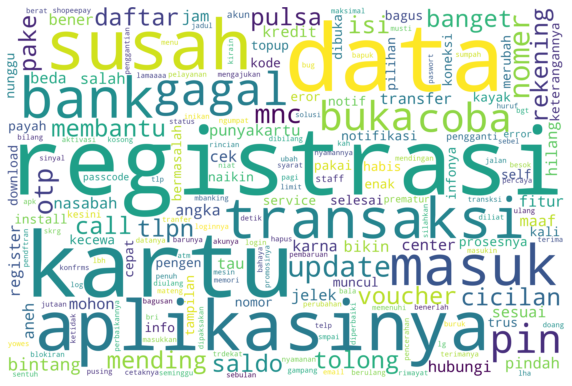

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="white", 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
app_reviews_bad.loc[(app_reviews_bad['content'].str.contains("saldo")), ['content','score']].head(10)

,content,score
8,"aplikasi yang sangat tidak membantu sama sekali,pelayanan cs nya pun lamaaaa banget rasa pengen ngumpat aja,apa"" musti diulang"" mulu,niat isi saldo shopeepay jadi bala doang,mana prosesnya 2-3hari lama benerlah.",1
38,kalau buat cek saldo bri bisa nga ya,1
64,pendaftaran sukses tapi tdk bisa cek saldo dan teranfer lewat aplikasi dan liat nomer rekening pun tdk biasa jadi sy kasi bintang 1 aja,1
69,klo bisa transaksi terakhir dan saldo jangan di depan karna itu kan prifasi.,3


Dapat dilihat beberapa orang berbicara tentang masalah transaksi dan masalah aplikasi lainnya

In [ ]:
# put bad reviews in new dataframe
app_reviews_good = app_reviews_df[app_reviews_df.score>=4]

In [ ]:
# Sample of good reviews
app_reviews_good.loc[app_reviews_df.score>=4,['content','score']].head(10)

,content,score
16,maaf motion saya melakukan transaksi pulsa tadi gagal karena salah nomor tujuan tapi saldonya tetap ke potong apa emang sudah peraturannya seperti itu mohon infonya?🙏🙏,5
26,bagus sangat membantu,5
28,cara buka blokir gmn..saya 3 kali salah pasword,5
30,bagus banget aps nya,5
32,terimakasih aplikasi sudah bisa dipergunakan kembali .,5
33,terima kasih. top up ovo gojek dan shopeepay jdi mudah,5
41,cara buka rekeningnha bagaimana kak,5
42,mantaaaap jadi mudah satu aplikasi buat 2 kegunaan,5
43,sudah bisa dan lancar,5
44,sulit di buka,5


In [ ]:
# put good reviews in new dataframe
app_reviews_good.loc[(app_reviews_df['content'].str.contains("bagus")), ['content','score']].head()

,content,score
26,bagus sangat membantu,5
30,bagus banget aps nya,5
68,semakin bagus aplikasinya... mengakomodir semua kebutuhan mengenai perbankan...,5
96,bagus dan praktis mudah di akses,5
106,"aplikasi motion ini menurut sy bagus, namun pagi ini motion saya ada kendala & minta update, akhirny sy update. setelah diupdate, motion saya ga bisa dibuka, dgn keterangan ""oops terjadi kesalahan. mohon tutup aplikasi & coba kembali"". hal ini saya lakusan berulang smpai ke 7x (kali), dan masih sama seperti itu. mohon dibantu sis app motion sy, sy jadi gbsa liat trx akhir. regards,",5


In [ ]:
app_reviews_good.head()

,reviewId,userName,userImage,content,score,jempol,reviewCreatedVersion,at,replyContent,repliedAt,words,stemmed_words,stem_meaningful,processed
16,gp:AOqpTOFvVkr5DDyzH-mrAassb8XzdMZlXr4mSQSu-3vFFGq3bFLFBozFPHw22OkYuG3RnPixmAkP11bBQFCv9w,Achmad Nuryadi,https://play-lh.googleusercontent.com/-dSxl2p1gCz4/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclf6f28AmFphnL72mouL-VdaGx7JA/photo.jpg,maaf motion saya melakukan transaksi pulsa tadi gagal karena salah nomor tujuan tapi saldonya tetap ke potong apa emang sudah peraturannya seperti itu mohon infonya?🙏🙏,5,4,1.0.7,2020-12-21 14:06:34,"Hi Achmad Nuryadi, terima kasih banyak untuk reviewnya. Gunakan selalu MOTION untuk kenyamanan bertransaksi kamu. Terima kasih",2020-12-28 07:31:19,"[maaf, motion, saya, melakukan, transaksi, pulsa, tadi, gagal, karena, salah, nomor, tujuan, tapi, saldonya, tetap, ke, potong, apa, emang, sudah, peraturannya, seperti, itu, mohon, infonya]","[maaf, motion, saya, melakukan, transaksi, pulsa, tadi, gagal, karena, salah, nomor, tujuan, tapi, saldonya, tetap, ke, potong, apa, emang, sudah, peraturannya, seperti, itu, mohon, infonya]","[maaf, transaksi, pulsa, gagal, salah, nomor, tujuan, saldonya, potong, emang, peraturannya, mohon, infonya]",maaf transaksi pulsa gagal salah nomor tujuan saldonya potong emang peraturannya mohon infonya
26,gp:AOqpTOEwRmQcZFhFRAuZ9MqeMXC3-PTXLQ0WCoQJamcLg1Mrm8NMYJQhbCnTqTFrV4kXHiaBMTNYQPQPJxcPrg,Sari Fitriana,https://play-lh.googleusercontent.com/-W0BiJHJlVDg/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucnco94vmlelVX-YJwO7AH-WcQZhSQ/photo.jpg,bagus sangat membantu,5,0,1.0.8,2021-02-03 02:04:54,"Hi, Sari Fitriana. Terima kasih banyak untuk review yang diberikan. Gunakan terus MOTION untuk kenyamanan bertransaksi Anda. Terima kasih",2021-02-16 03:57:37,"[bagus, sangat, membantu]","[bagus, sangat, membantu]","[bagus, membantu]",bagus membantu
28,gp:AOqpTOFcqVaDFopFdFCplF5Jxes6pkU0BUgbC-NilVBuDqSF8YQrKxHhgp7taUDXRsYSDhroO5tZARXXVRT8fA,Novis Setiawan,https://play-lh.googleusercontent.com/-x6SIfAsklW0/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucms9H36rQcV3WMV9O0x11ouqKhu1w/photo.jpg,cara buka blokir gmn..saya 3 kali salah pasword,5,0,1.0.7,2021-01-29 18:25:12,"Hi, Novis Setiawan. Terima kasih banyak untuk review yang diberikan. Gunakan terus MOTION untuk kenyamanan bertransaksi Anda. Untuk melakukan unblock account MOTION dapat menghubungi layanan Call Center MNC Bank di nomor 1500188 atau mengunjungi Kantor Cabang MNC Bank terdekat. Terima kasih",2021-02-02 04:50:46,"[cara, buka, blokir, kali, salah, pasword]","[cara, buka, blokir, kali, salah, pasword]","[buka, blokir, kali, salah, pasword]",buka blokir kali salah pasword
30,gp:AOqpTOHBeZKnAEqzB4NOyOC24fn8Aa7Hgcb0HcLSWOlxKolaXyMu_6DNQKd4R3c6KD2oD1bFEeidL1F6EZ07Vw,Alya Hasna 2,https://play-lh.googleusercontent.com/-1FpDHMaj8aA/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmOIgi2Tq0bHsXFAQheAAJ6MHIbRw/photo.jpg,bagus banget aps nya,5,0,1.0.9,2021-02-14 13:48:37,"Hi, Alya Hasna 2. Terima kasih banyak untuk review yang diberikan. Gunakan terus MOTION untuk kenyamanan bertransaksi Anda. Terima kasih",2021-02-16 04:25:56,"[bagus, banget, aps, nya]","[bagus, banget, aps, nya]","[bagus, banget, aps]",bagus banget aps
32,gp:AOqpTOFXjEFfNIQn12FkOXh64-EnRXrGlp_2MJKIxQWft-EupYppC1MIdhjjj4FOJUs-kDPc2qGlWxJON-B3WQ,Dafta Safta,https://play-lh.googleusercontent.com/-9Cnuo8kpXlI/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclHOxnCQUDoaMLFRjnjwvPHcDVZdA/photo.jpg,terimakasih aplikasi sudah bisa dipergunakan kembali .,5,1,1.0.7,2020-12-12 14:26:03,"Hi Dafta Safta, terima kasih banyak untuk reviewnya. Gunakan selalu MOTION untuk kenyamanan bertransaksi kamu. Terima kasih",2020-12-14 02:38:36,"[terimakasih, aplikasi, sudah, bisa, dipergunakan, kembali]","[terimakasih, aplikasi, sudah, bisa, dipergunakan, kembali]",[terimakasih],terimakasih


In [ ]:
text = " ".join(review for review in app_reviews_good.processed)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3425 words in the combination of all review.


Ada 3425 kata dalam kombinasi dari semua ulasan baik.

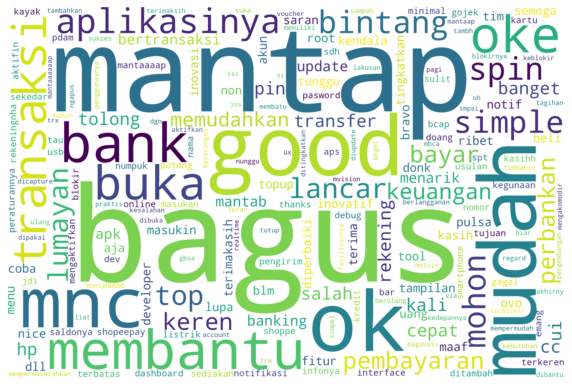

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="white", 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
app_reviews_good.loc[(app_reviews_good['content'].str.contains("mudah")), ['content','score']].head(10)

,content,score
33,terima kasih. top up ovo gojek dan shopeepay jdi mudah,5
42,mantaaaap jadi mudah satu aplikasi buat 2 kegunaan,5
46,"mudah ,tidak ribet",5
49,cepat dan mudah,5
66,"aplikasi nya keren banget , mempermudah dalam bertransaksi keuangan yang memiliki account mnc bank.",5
72,"sangat membatu dalam hal keuangan, simple, mudah, dan cepat",5
76,transaksi jadi mudah dan penggunaanya juga ga ribet...bintang 5 buat motion,5
89,aplikasi yg sangat memudahkan bertransaksi,5
92,sangat memudahkan dalam bertransaksi,5
96,bagus dan praktis mudah di akses,5
